In [1]:
import pandas as pd
import numpy as np
from CaseInsensitiveDict import CaseInsensitiveDict
import requests
import matplotlib.pyplot as plt
import seaborn as sns


Getting Started

In [3]:
df = pd.read_csv('datasets/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv', delimiter=",")

In [4]:
df.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,RI,2020/12/27,6,8,1,5,9,1,21.0,14,...,NaN,0,NaN,0,NaN,0,70.0,13,91.0,13
1,IA,2020/12/22,5,68,50,6,66,51,5.0,121,...,NaN,0,NaN,0,NaN,0,0.0,1,0.0,1
2,VT,2020/10/16,1,15,1,1,15,1,0.0,16,...,NaN,0,NaN,0,0.0,1,19.0,1,33.0,1
3,VI,2020/10/15,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,VI,2020/10/13,1,1,0,2,0,0,0.0,2,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [707]:
df["date"] = pd.to_datetime(df['date']) 

In [708]:
df["Month"] = df['date'].dt.month
df["Year"] = df['date'].dt.year

1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [709]:
df_filtred1 = df[["state","date",'Month',"inpatient_beds_used_covid","all_pediatric_inpatient_bed_occupied",'inpatient_beds',"previous_day_admission_pediatric_covid_confirmed_0_4","previous_day_admission_pediatric_covid_confirmed_5_11","previous_day_admission_pediatric_covid_confirmed_12_17","previous_day_admission_adult_covid_confirmed_18-19","previous_day_admission_adult_covid_confirmed_20-29","previous_day_admission_adult_covid_confirmed_30-39","previous_day_admission_adult_covid_confirmed_40-49","previous_day_admission_adult_covid_confirmed_50-59","previous_day_admission_adult_covid_confirmed_60-69","previous_day_admission_adult_covid_confirmed_70-79","previous_day_admission_adult_covid_confirmed_80+","total_adult_patients_hospitalized_confirmed_covid","adult_icu_bed_covid_utilization_denominator"]].fillna(0)

In [710]:
df_filtred1.head(5)

,state,date,Month,inpatient_beds_used_covid,all_pediatric_inpatient_bed_occupied,inpatient_beds,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_80+,total_adult_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization_denominator
0,RI,2020-12-27,12,470.0,542.0,2516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,3.0,6.0,420.0,162.0
1,IA,2020-12-22,12,661.0,0.0,8046.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,10.0,27.0,25.0,34.0,634.0,680.0
2,VT,2020-10-16,10,2.0,46.0,1301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0
3,VI,2020-10-15,10,4.0,0.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,20.0
4,VI,2020-10-13,10,4.0,0.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,20.0


In [711]:
df_filtred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47747 entries, 0 to 47746
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   state                                                   47747 non-null  object        
 1   date                                                    47747 non-null  datetime64[ns]
 2   Month                                                   47747 non-null  int64         
 3   inpatient_beds_used_covid                               47747 non-null  float64       
 4   all_pediatric_inpatient_bed_occupied                    47747 non-null  float64       
 5   inpatient_beds                                          47747 non-null  float64       
 6   previous_day_admission_pediatric_covid_confirmed_0_4    47747 non-null  float64       
 7   previous_day_admission_pediatric_covid_confirmed_5_11   47

In [712]:
df_filtred1.isna().sum()

state                                                     0
date                                                      0
Month                                                     0
inpatient_beds_used_covid                                 0
all_pediatric_inpatient_bed_occupied                      0
inpatient_beds                                            0
previous_day_admission_pediatric_covid_confirmed_0_4      0
previous_day_admission_pediatric_covid_confirmed_5_11     0
previous_day_admission_pediatric_covid_confirmed_12_17    0
previous_day_admission_adult_covid_confirmed_18-19        0
previous_day_admission_adult_covid_confirmed_20-29        0
previous_day_admission_adult_covid_confirmed_30-39        0
previous_day_admission_adult_covid_confirmed_40-49        0
previous_day_admission_adult_covid_confirmed_50-59        0
previous_day_admission_adult_covid_confirmed_60-69        0
previous_day_admission_adult_covid_confirmed_70-79        0
previous_day_admission_adult_covid_confi

In [713]:
df_filtred1.fillna(0)

,state,date,Month,inpatient_beds_used_covid,all_pediatric_inpatient_bed_occupied,inpatient_beds,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_80+,total_adult_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization_denominator
0,RI,2020-12-27,12,470.0,542.0,2516.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,3.0,6.0,420.0,162.0
1,IA,2020-12-22,12,661.0,0.0,8046.0,0.0,0.0,0.0,0.0,5.0,5.0,5.0,10.0,27.0,25.0,34.0,634.0,680.0
2,VT,2020-10-16,10,2.0,46.0,1301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0
3,VI,2020-10-15,10,4.0,0.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,20.0
4,VI,2020-10-13,10,4.0,0.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47742,TN,2022-02-16,2,2284.0,834.0,20307.0,3.0,3.0,0.0,2.0,6.0,9.0,8.0,30.0,38.0,68.0,47.0,2163.0,2363.0
47743,UT,2022-02-04,2,788.0,263.0,6257.0,6.0,1.0,4.0,0.0,24.0,21.0,10.0,13.0,25.0,21.0,23.0,706.0,538.0
47744,MA,2022-02-18,2,725.0,993.0,18595.0,1.0,0.0,1.0,0.0,8.0,12.0,5.0,11.0,12.0,12.0,23.0,581.0,1259.0
47745,IN,2022-02-01,2,2633.0,46.0,14803.0,1.0,0.0,1.0,2.0,23.0,26.0,21.0,43.0,77.0,83.0,51.0,2382.0,1926.0


In [714]:
start_date = "2020-01-01"
end_date = "2020-06-30"

mask = (df_filtred1['date'] > start_date) & (df_filtred1['date'] <= end_date)
df_filtred1_6m = df_filtred1.loc[mask]
df_filtred1_6m.reset_index()
df_filtred1_6m = df_filtred1_6m.sort_values(by="date")


In [715]:
df_filtred1_6m.describe()

,Month,inpatient_beds_used_covid,all_pediatric_inpatient_bed_occupied,inpatient_beds,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_80+,total_adult_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization_denominator
count,6685.000000,6685.000000,6685.0,6685.000000,6685.0,6685.0,6685.0,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000,6685.000000
mean,4.323710,661.292446,0.0,8002.690352,0.0,0.0,0.0,0.000748,0.005385,0.010770,0.013164,0.033358,0.026926,0.032162,0.026178,16.307255,1.049514
std,1.341099,1338.890951,0.0,11550.773922,0.0,0.0,0.0,0.027340,0.166729,0.273841,0.388117,0.858439,0.733399,0.924926,0.721602,112.740082,28.135478
min,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,13.000000,0.0,766.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,184.000000,0.0,3687.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,635.000000,0.0,10973.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,14126.000000,0.0,70798.000000,0.0,0.0,0.0,1.000000,6.000000,8.000000,14.000000,25.000000,24.000000,32.000000,24.000000,1792.000000,903.000000


¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020

In [716]:
df_filtred_5_estados = df_filtred1_6m[['state','inpatient_beds_used_covid','all_pediatric_inpatient_bed_occupied']].groupby("state").sum().sort_values(by="inpatient_beds_used_covid", ascending=False).head(5)
df_filtred_5_estados

,inpatient_beds_used_covid,all_pediatric_inpatient_bed_occupied
state,,
NY,686528.0,0.0
CA,434721.0,0.0
FL,322227.0,0.0
TX,246237.0,0.0
IL,214010.0,0.0


In [717]:
df_filtred1_6m.groupby(by="Month").cumsum()

,inpatient_beds_used_covid,all_pediatric_inpatient_bed_occupied,inpatient_beds,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_80+,total_adult_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization_denominator
21176,0.0,0.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19867,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16724,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13052,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18410,0.0,0.0,238.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,1277751.0,0.0,20441088.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,18010.0,0.0
6181,1284538.0,0.0,20509252.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,18123.0,0.0
8642,1284569.0,0.0,20511878.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,18123.0,0.0
6554,1284780.0,0.0,20520113.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,18123.0,0.0


Influye el rango etario?

In [718]:
df_filtred1_6m.drop(columns=['state','inpatient_beds']).sort_values(by="Month").cumsum()

,date,Month,inpatient_beds_used_covid,all_pediatric_inpatient_bed_occupied,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_80+,total_adult_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization_denominator
21176,2020-01-02 00:00:00.000000000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18934,2070-01-21 00:00:00.000000000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17488,2120-02-11 00:00:00.000000000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11746,2170-03-02 00:00:00.000000000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20971,2220-03-22 00:00:00.000000000,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,2015-08-20 03:46:57.007820800,28880,4415843.0,0.0,0.0,0.0,0.0,5.0,36.0,72.0,88.0,223.0,180.0,215.0,175.0,108701.0,7016.0
8493,2066-01-27 03:46:57.007820800,28886,4415992.0,0.0,0.0,0.0,0.0,5.0,36.0,72.0,88.0,223.0,180.0,215.0,175.0,108701.0,7016.0
7806,2116-07-07 03:46:57.007820800,28892,4419600.0,0.0,0.0,0.0,0.0,5.0,36.0,72.0,88.0,223.0,180.0,215.0,175.0,108701.0,7016.0
7816,2166-12-15 03:46:57.007820800,28898,4420240.0,0.0,0.0,0.0,0.0,5.0,36.0,72.0,88.0,223.0,180.0,215.0,175.0,109014.0,7016.0


In [719]:
df_filtred1_6m.fillna(0).corr()            #Puede que no se observe altos niveles de correlación debido a la alta falta de datos

,Month,inpatient_beds_used_covid,all_pediatric_inpatient_bed_occupied,inpatient_beds,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_80+,total_adult_patients_hospitalized_confirmed_covid,adult_icu_bed_covid_utilization_denominator
Month,1.000000,0.218175,NaN,0.398673,NaN,NaN,NaN,-0.067810,-0.066678,-0.045345,-0.065963,-0.057724,-0.063623,-0.066289,-0.064413,-0.001771,-0.063069
inpatient_beds_used_covid,0.218175,1.000000,NaN,0.722955,NaN,NaN,NaN,0.024844,0.025434,0.012892,0.035889,0.017770,0.018881,0.021067,0.019473,0.205772,0.018128
all_pediatric_inpatient_bed_occupied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inpatient_beds,0.398673,0.722955,NaN,1.000000,NaN,NaN,NaN,0.000953,0.003631,0.005505,0.008843,0.003645,0.002034,0.001760,0.001967,0.127907,0.001994
previous_day_admission_pediatric_covid_confirmed_0_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_day_admission_pediatric_covid_confirmed_5_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_day_admission_pediatric_covid_confirmed_12_17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous_day_admission_adult_covid_confirmed_18-19,-0.067810,0.024844,NaN,0.000953,NaN,NaN,NaN,1.000000,0.983736,0.598415,0.986022,0.795756,0.894360,0.945661,0.909011,0.430942,0.877117
previous_day_admission_adult_covid_confirmed_20-29,-0.066678,0.025434,NaN,0.003631,NaN,NaN,NaN,0.983736,1.000000,0.719632,0.995380,0.882026,0.953160,0.983592,0.962559,0.429171,0.941589
previous_day_admission_adult_covid_confirmed_30-39,-0.045345,0.012892,NaN,0.005505,NaN,NaN,NaN,0.598415,0.719632,1.000000,0.702505,0.959493,0.892492,0.825596,0.876839,0.283730,0.908436


2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

Intervalos de crecimiento y decrecimiento
Puntos críticos (mínimos y máximos)

Según lo que he encontrado en Nueva York fue del 22 de marzo al 8 de junio

In [720]:
df_2 = df[['date','Month','state','inpatient_beds_used_covid']]

In [721]:
start_date = "2020-03-22"
end_date = "2020-06-08"

mask = (df_2['date'] > start_date) & (df_2['date'] <= end_date)
df_ny = df_2.loc[mask]
df_ny = df_ny.sort_values(by="date")

In [722]:
df_ny = df_ny[df_ny["state"]=="NY"]
df_ny

,date,Month,state,inpatient_beds_used_covid
13146,2020-03-23,3,NY,417.0
19589,2020-03-24,3,NY,554.0
14306,2020-03-25,3,NY,843.0
19983,2020-03-26,3,NY,992.0
17283,2020-03-27,3,NY,1205.0
...,...,...,...,...
19535,2020-06-04,6,NY,4261.0
16335,2020-06-05,6,NY,4166.0
11016,2020-06-06,6,NY,3989.0
7396,2020-06-07,6,NY,3720.0


In [723]:
df_ny.describe()

,Month,inpatient_beds_used_covid
count,78.000000,78.000000
mean,4.487179,8025.115385
std,0.833450,4089.333547
min,3.000000,417.000000
25%,4.000000,4551.750000
50%,4.500000,7908.500000
75%,5.000000,12356.000000
max,6.000000,14126.000000


In [724]:
df_ny.sum()

C:\Users\Ale\AppData\Local\Temp\ipykernel_7180\1814883372.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ny.sum()


Month                                                                      350
state                        NYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNYNY...
inpatient_beds_used_covid                                             625959.0
dtype: object

In [725]:
df_ny[["inpatient_beds_used_covid","Month"]].groupby(by="Month").max()

,inpatient_beds_used_covid
Month,
3,10251.0
4,14126.0
5,9229.0
6,4261.0


In [726]:
from scipy.signal import find_peaks_cwt

<AxesSubplot:xlabel='Month', ylabel='inpatient_beds_used_covid'>

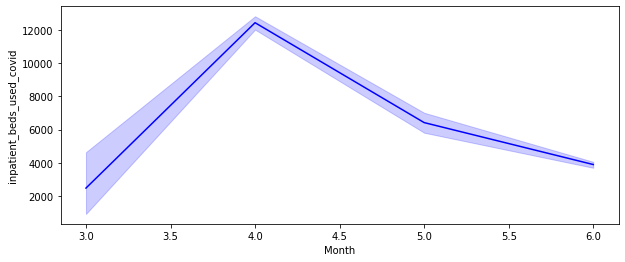

In [727]:
plt.figure(figsize = (10,4))
sns.lineplot(x = 'Month', y = 'inpatient_beds_used_covid', data = df_ny,color="blue")     

3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [728]:
df_filtred_2020 = df[['date','Month','state','adult_icu_bed_covid_utilization_denominator','all_pediatric_inpatient_bed_occupied']]

start_date = "2020-01-01"
end_date = "2020-12-31"

mask = (df_filtred_2020['date'] > start_date) & (df_filtred_2020['date'] <= end_date)
df_uci_beds_2020 = df_filtred_2020.loc[mask].drop(columns='all_pediatric_inpatient_bed_occupied')
df_uci_beds_2020.reset_index()
df_uci_beds_2020 = df_uci_beds_2020.sort_values(by="date")

df_uci_beds_2020.fillna(method='ffill')

,date,Month,state,adult_icu_bed_covid_utilization_denominator
13671,2020-01-02,1,LA,NaN
21176,2020-01-02,1,MN,NaN
20511,2020-01-02,1,NC,NaN
20350,2020-01-02,1,NV,903.0
13052,2020-01-02,1,MT,903.0
...,...,...,...,...
43831,2020-12-31,12,SD,242.0
36837,2020-12-31,12,NY,5368.0
36774,2020-12-31,12,TN,2345.0
38974,2020-12-31,12,AL,1468.0


In [729]:
df_uci_beds_2020.head()

,date,Month,state,adult_icu_bed_covid_utilization_denominator
13671,2020-01-02,1,LA,NaN
21176,2020-01-02,1,MN,NaN
20511,2020-01-02,1,NC,NaN
20350,2020-01-02,1,NV,903.0
13052,2020-01-02,1,MT,NaN


In [730]:
df_uci_beds_2020.groupby(by='state').sum().sort_values(by="adult_icu_bed_covid_utilization_denominator",ascending=False).head(5)

,Month,adult_icu_bed_covid_utilization_denominator
state,,
CA,2305,1194140.0
TX,2383,1159457.0
FL,2262,993827.0
NY,2256,823197.0
OH,2295,639067.0


4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [731]:

df_pedriatic_beds_covid = df_filtred_2020.loc[mask].drop(columns=['adult_icu_bed_covid_utilization_denominator'])
df_pedriatic_beds_covid.reset_index()
df_pedriatic_beds_covid = df_pedriatic_beds_covid.sort_values(by="date")

df_pedriatic_beds_covid.fillna(method='ffill')

df_pedriatic_beds_covid.groupby(by='state').sum().sort_values(by='all_pediatric_inpatient_bed_occupied',ascending=False).head()

,Month,all_pediatric_inpatient_bed_occupied
state,,
CA,2305,483142.0
NY,2256,440365.0
PA,2295,280480.0
IL,2319,274279.0
MI,2295,233298.0


5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [732]:
df_porc_camas_uci = df[["state","inpatient_beds_used_covid","inpatient_beds"]]

In [733]:
df_porc_camas_uci.fillna(method="ffill").head()

,state,inpatient_beds_used_covid,inpatient_beds
0,RI,470.0,2516.0
1,IA,661.0,8046.0
2,VT,2.0,1301.0
3,VI,4.0,188.0
4,VI,4.0,188.0


In [734]:
df_porc_camas_uci['porc_camas_%'] = round(((df_porc_camas_uci["inpatient_beds_used_covid"]/df_porc_camas_uci["inpatient_beds"]))*100,2)

C:\Users\Ale\AppData\Local\Temp\ipykernel_7180\1292472624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_porc_camas_uci['porc_camas_%'] = round(((df_porc_camas_uci["inpatient_beds_used_covid"]/df_porc_camas_uci["inpatient_beds"]))*100,2)


In [764]:
df_porc_camas_uci.groupby(by="state").mean().sort_values(by='porc_camas_%',ascending=False)

,inpatient_beds_used_covid,inpatient_beds,porc_camas_%
state,,,
GA,2317.882022,20289.589888,11.576809
AZ,1589.534308,14674.145107,11.201417
MD,1031.932584,10331.576404,10.107978
LA,751.406742,12168.429213,9.904573
NV,709.011803,7532.342275,9.252736
NY,3925.257697,45883.567845,9.072132
CA,5517.109497,60731.890503,8.976156
FL,4743.072810,56795.947668,8.830592
NJ,1501.535955,20654.975281,8.600292


In [761]:
df_porc_camas_uci['porc_camas_%'].sum()

326043.34

6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [736]:
df_deaths = df[["date","state","deaths_covid"]]

In [737]:
start_date = "2021-01-01"
end_date = "2021-06-30"

mask = (df_deaths['date'] > start_date) & (df_deaths['date'] <= end_date)
df_deaths_2021 = df_deaths.loc[mask]
df_deaths_2021.reset_index()
df_deaths_2021 = df_deaths_2021.sort_values(by="date")

In [738]:
df_deaths_2021.groupby(by='state').sum().sort_values("deaths_covid",ascending=False)

,deaths_covid
state,
CA,23306.0
TX,15060.0
NY,11797.0
FL,9052.0
PA,6273.0
GA,5520.0
NC,4855.0
NJ,4758.0
AZ,4569.0


7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

In [739]:
df_faltaPersonal = df[["critical_staffing_shortage_today_yes","deaths_covid" ]]

In [740]:
#df_camasXdeath.fillna(method="ffill")
df_faltaPersonal.fillna(0)

,critical_staffing_shortage_today_yes,deaths_covid
0,6,8.0
1,5,14.0
2,1,0.0
3,1,0.0
4,1,0.0
...,...,...
47742,2,21.0
47743,0,3.0
47744,0,0.0
47745,32,43.0


In [741]:
df_faltaPersonal.corr() # relación positiva, baja

,critical_staffing_shortage_today_yes,deaths_covid
critical_staffing_shortage_today_yes,1.000000,0.291189
deaths_covid,0.291189,1.000000


8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

In [742]:
df_peor_mes = df[['date','Year','Month','inpatient_beds','inpatient_beds_used_covid','inpatient_beds_utilization_numerator',"deaths_covid","total_adult_patients_hospitalized_confirmed_covid","all_pediatric_inpatient_bed_occupied","critical_staffing_shortage_today_yes"]]
df_peor_mes.fillna(method="ffill")

,date,Year,Month,inpatient_beds,inpatient_beds_used_covid,inpatient_beds_utilization_numerator,deaths_covid,total_adult_patients_hospitalized_confirmed_covid,all_pediatric_inpatient_bed_occupied,critical_staffing_shortage_today_yes
0,2020-12-27,2020,12,2516.0,470.0,2247.0,8.0,420.0,542.0,6
1,2020-12-22,2020,12,8046.0,661.0,4973.0,14.0,634.0,0.0,5
2,2020-10-16,2020,10,1301.0,2.0,901.0,0.0,0.0,46.0,1
3,2020-10-15,2020,10,188.0,4.0,98.0,0.0,4.0,46.0,1
4,2020-10-13,2020,10,188.0,4.0,94.0,0.0,4.0,46.0,1
...,...,...,...,...,...,...,...,...,...,...
47742,2022-02-16,2022,2,20307.0,2284.0,14909.0,21.0,2163.0,834.0,2
47743,2022-02-04,2022,2,6257.0,788.0,3945.0,3.0,706.0,263.0,0
47744,2022-02-18,2022,2,18595.0,725.0,16085.0,0.0,581.0,993.0,0
47745,2022-02-01,2022,2,14803.0,2633.0,12045.0,43.0,2382.0,46.0,32


In [743]:
start_date = "2020-03-11"           # WHO declara inicio de la pandemia
end_date = "2022-12-31"

mask = (df_peor_mes['date'] > start_date) & (df_peor_mes['date'] <= end_date)
df_usa = df_peor_mes.loc[mask]

df_usa = df_usa.sort_values(by="date")

In [744]:
df_peor_mes['deaths_covid_%'] = df_peor_mes['deaths_covid']/df_peor_mes['deaths_covid'].max()
df_peor_mes['total_adult_patients_hospitalized_confirmed_covid_%'] = df_peor_mes['total_adult_patients_hospitalized_confirmed_covid']/df_peor_mes['total_adult_patients_hospitalized_confirmed_covid'].max()
df_peor_mes['critical_staffing_shortage_today_yes_%'] = df_peor_mes['critical_staffing_shortage_today_yes']/df_peor_mes['critical_staffing_shortage_today_yes'].max()

C:\Users\Ale\AppData\Local\Temp\ipykernel_7180\3909164910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peor_mes['deaths_covid_%'] = df_peor_mes['deaths_covid']/df_peor_mes['deaths_covid'].max()
C:\Users\Ale\AppData\Local\Temp\ipykernel_7180\3909164910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_peor_mes['total_adult_patients_hospitalized_confirmed_covid_%'] = df_peor_mes['total_adult_patients_hospitalized_confirmed_covid']/df_peor_mes['total_adult_patients_hospitalized_confirmed_covid']

In [765]:
df_usa.groupby(by=['Year',"Month"], as_index=False).sum().sort_values(by=["deaths_covid","total_adult_patients_hospitalized_confirmed_covid","critical_staffing_shortage_today_yes","all_pediatric_inpatient_bed_occupied"],ascending=False)

,Year,Month,inpatient_beds,inpatient_beds_used_covid,inpatient_beds_utilization_numerator,deaths_covid,total_adult_patients_hospitalized_confirmed_covid,all_pediatric_inpatient_bed_occupied,critical_staffing_shortage_today_yes
10,2021,1,24773417.0,3911704.0,18148352.0,66020.0,3605942.0,925287.0,31834
9,2020,12,24796170.0,3701967.0,17817600.0,56674.0,3376986.0,1004560.0,37425
2,2020,5,18718506.0,1576600.0,10927973.0,54884.0,24939.0,0.0,6
18,2021,9,23234216.0,2778874.0,17882191.0,44903.0,2555691.0,1107002.0,29035
22,2022,1,23632076.0,4478141.0,18436924.0,42246.0,4134682.0,515786.0,28320
11,2021,2,22126890.0,2043183.0,15900663.0,33733.0,1811779.0,824163.0,22915
1,2020,4,13210940.0,1480053.0,6609701.0,33572.0,56186.0,0.0,30
8,2020,11,23875843.0,2421940.0,16855911.0,33465.0,2096096.0,1011020.0,32499
21,2021,12,23641026.0,2215216.0,18121741.0,32541.0,1982691.0,1157894.0,31424
17,2021,8,24066355.0,2657468.0,18267832.0,32171.0,2446081.0,1073743.0,23797


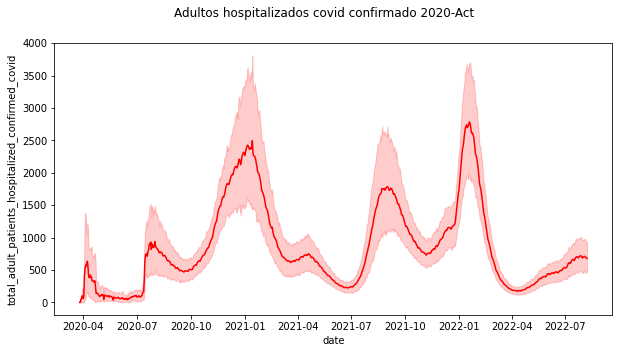

In [746]:
fig = plt.figure(figsize = (10,5))
sns.lineplot(x = 'date', y = 'total_adult_patients_hospitalized_confirmed_covid', data = df_usa,color="red")
fig.suptitle('Adultos hospitalizados covid confirmado 2020-Act');

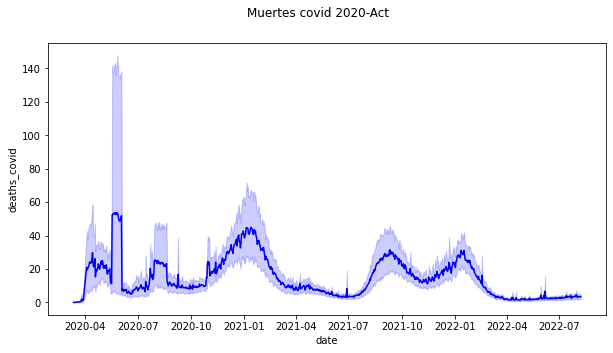

In [747]:
fig = plt.figure(figsize = (10,5))
sns.lineplot(x = 'date', y = 'deaths_covid', data = df_usa,color="blue")  
fig.suptitle('Muertes covid 2020-Act');

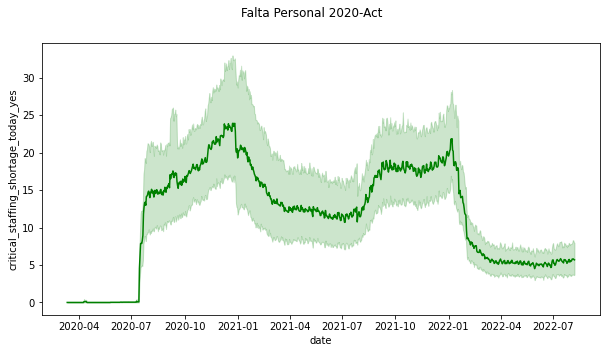

In [748]:
fig = plt.figure(figsize = (10,5))
sns.lineplot(x = 'date', y = 'critical_staffing_shortage_today_yes', data = df_usa,color="green")  
fig.suptitle('Falta Personal 2020-Act');

Calculando en % 

In [749]:
start_date = "2020-03-11"           # WHO declara inicio de la pandemia
end_date = "2020-12-31"

mask = (df_peor_mes['date'] > start_date) & (df_peor_mes['date'] <= end_date)
df_peor_mes_2020 = df_peor_mes.loc[mask]

df_peor_mes_2020 = df_peor_mes_2020.sort_values(by="date")
df_peor_mes_2020.fillna(method='ffill')

,date,Year,Month,inpatient_beds,inpatient_beds_used_covid,inpatient_beds_utilization_numerator,deaths_covid,total_adult_patients_hospitalized_confirmed_covid,all_pediatric_inpatient_bed_occupied,critical_staffing_shortage_today_yes,deaths_covid_%,total_adult_patients_hospitalized_confirmed_covid_%,critical_staffing_shortage_today_yes_%
20201,2020-03-12,2020,3,582.0,5.0,382.0,0.0,NaN,NaN,0,0.000000,NaN,0.000000
16258,2020-03-12,2020,3,50.0,0.0,50.0,0.0,NaN,NaN,0,0.000000,NaN,0.000000
12096,2020-03-12,2020,3,213.0,0.0,142.0,0.0,NaN,NaN,0,0.000000,NaN,0.000000
11972,2020-03-12,2020,3,812.0,14.0,494.0,0.0,NaN,NaN,0,0.000000,NaN,0.000000
16345,2020-03-12,2020,3,115.0,0.0,494.0,0.0,NaN,NaN,0,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43831,2020-12-31,2020,12,2842.0,282.0,1664.0,3.0,261.0,297.0,1,0.001333,0.008832,0.005236
36837,2020-12-31,2020,12,53783.0,8831.0,38360.0,118.0,8045.0,2698.0,9,0.052421,0.272223,0.047120
36774,2020-12-31,2020,12,20394.0,3385.0,12952.0,68.0,3202.0,96.0,31,0.030209,0.108348,0.162304
38974,2020-12-31,2020,12,15733.0,3095.0,12225.0,36.0,2909.0,0.0,38,0.015993,0.098433,0.198953


In [750]:
df_peor_mes_2020.groupby(by="Month").sum().sort_values(by=["deaths_covid","total_adult_patients_hospitalized_confirmed_covid","critical_staffing_shortage_today_yes","all_pediatric_inpatient_bed_occupied"],ascending=False)

,Year,inpatient_beds,inpatient_beds_used_covid,inpatient_beds_utilization_numerator,deaths_covid,total_adult_patients_hospitalized_confirmed_covid,all_pediatric_inpatient_bed_occupied,critical_staffing_shortage_today_yes,deaths_covid_%,total_adult_patients_hospitalized_confirmed_covid_%,critical_staffing_shortage_today_yes_%
Month,,,,,,,,,,,
12,3318860,24796170.0,3701967.0,17817600.0,56674.0,3376986.0,1004560.0,37425,25.177255,114.268805,195.942408
5,3318860,18718506.0,1576600.0,10927973.0,54884.0,24939.0,0.0,6,24.382052,0.843874,0.031414
4,3197660,13210940.0,1480053.0,6609701.0,33572.0,56186.0,0.0,30,14.914260,1.901194,0.157068
11,3211800,23875843.0,2421940.0,16855911.0,33465.0,2096096.0,1011020.0,32499,14.866726,70.926674,170.151832
8,3318860,22531714.0,1684254.0,15057880.0,31259.0,1189279.0,718222.0,24210,13.886717,40.242243,126.753927
7,3318860,19092642.0,2037217.0,12539350.0,19178.0,752156.0,319228.0,10028,8.519769,25.451088,52.502618
10,3318860,24693408.0,1389566.0,16896901.0,17963.0,1078372.0,866051.0,29021,7.980009,36.489426,151.942408
6,3211800,20532083.0,1285280.0,12950269.0,17541.0,18123.0,0.0,48,7.792537,0.613237,0.251309
9,3211800,22894932.0,1153712.0,15331575.0,15247.0,807171.0,726308.0,25950,6.773434,27.312659,135.863874


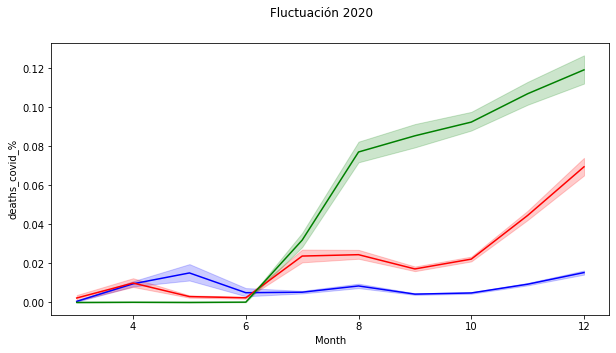

In [751]:
fig = plt.figure(figsize = (10,5))
sns.lineplot(x = 'Month', y = 'deaths_covid_%', data = df_peor_mes_2020,color="blue")  
sns.lineplot(x = 'Month', y = 'total_adult_patients_hospitalized_confirmed_covid_%', data = df_peor_mes_2020,color="red")  
sns.lineplot(x = 'Month', y = 'critical_staffing_shortage_today_yes_%', data = df_peor_mes_2020,color="green")  
fig.suptitle('Fluctuación 2020');

In [752]:
start_date = "2021-01-01"           # WHO declara inicio de la pandemia
end_date = "2021-12-31"

mask = (df_peor_mes['date'] > start_date) & (df_peor_mes['date'] <= end_date)
df_peor_mes_2021 = df_peor_mes.loc[mask]
df_peor_mes_2021.reset_index()
df_peor_mes_2021 = df_peor_mes_2021.sort_values(by="date")

In [753]:
df_peor_mes_2021.groupby(by="Month").sum().sort_values(by=["deaths_covid","total_adult_patients_hospitalized_confirmed_covid","critical_staffing_shortage_today_yes","all_pediatric_inpatient_bed_occupied"],ascending=False)

,Year,inpatient_beds,inpatient_beds_used_covid,inpatient_beds_utilization_numerator,deaths_covid,total_adult_patients_hospitalized_confirmed_covid,all_pediatric_inpatient_bed_occupied,critical_staffing_shortage_today_yes,deaths_covid_%,total_adult_patients_hospitalized_confirmed_covid_%,critical_staffing_shortage_today_yes_%
Month,,,,,,,,,,,
1,3213390,23962407.0,3781801.0,17580385.0,63877.0,3485824.0,894116.0,30811,28.377166,117.951612,161.314136
9,3274020,23234216.0,2778874.0,17882191.0,44903.0,2555691.0,1107002.0,29035,19.948023,86.478226,152.015707
2,2999164,22126890.0,2043183.0,15900663.0,33733.0,1811779.0,824163.0,22915,14.985784,61.306094,119.973822
12,3383154,23641026.0,2215216.0,18121741.0,32541.0,1982691.0,1157894.0,31424,14.456242,67.089331,164.523560
8,3336671,24066355.0,2657468.0,18267832.0,32171.0,2446081.0,1073743.0,23797,14.291870,82.769296,124.591623
10,3383154,23890334.0,1832606.0,18178381.0,29631.0,1626776.0,1171241.0,30184,13.163483,55.046053,158.031414
11,3274020,22846057.0,1502299.0,17261529.0,21662.0,1315365.0,1130279.0,28507,9.623279,44.508679,149.251309
3,3320503,24330622.0,1316948.0,17245847.0,16700.0,1104328.0,906967.0,21294,7.418925,37.367712,111.486911
4,3213390,23599190.0,1320650.0,16964259.0,14253.0,1119387.0,896496.0,19784,6.331853,37.877271,103.581152


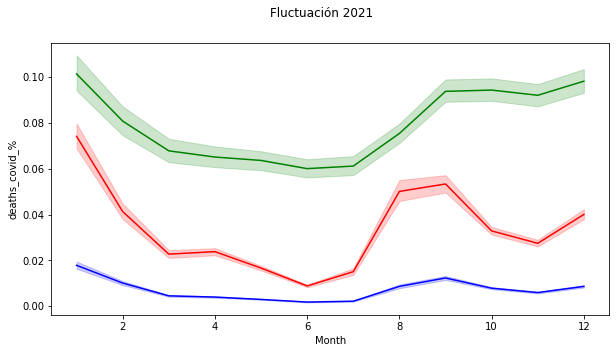

In [754]:
fig = plt.figure(figsize = (10,5))
sns.lineplot(x = 'Month', y = 'deaths_covid_%', data = df_peor_mes_2021,color="blue")  
sns.lineplot(x = 'Month', y = 'total_adult_patients_hospitalized_confirmed_covid_%', data = df_peor_mes_2021,color="red")  
sns.lineplot(x = 'Month', y = 'critical_staffing_shortage_today_yes_%', data = df_peor_mes_2021,color="green")  
fig.suptitle('Fluctuación 2021');

In [755]:
start_date = "2022-01-01"           # WHO declara inicio de la pandemia
end_date = "2022-12-31"

mask = (df_peor_mes['date'] > start_date) & (df_peor_mes['date'] <= end_date)
df_peor_mes_2022 = df_peor_mes.loc[mask]
df_peor_mes_2022.reset_index()
df_peor_mes_2022 = df_peor_mes_2022.sort_values(by="date")

In [756]:
df_peor_mes_2022.groupby(by="Month").sum().sort_values(by=["deaths_covid","total_adult_patients_hospitalized_confirmed_covid","critical_staffing_shortage_today_yes","all_pediatric_inpatient_bed_occupied"],ascending=False)

,Year,inpatient_beds,inpatient_beds_used_covid,inpatient_beds_utilization_numerator,deaths_covid,total_adult_patients_hospitalized_confirmed_covid,all_pediatric_inpatient_bed_occupied,critical_staffing_shortage_today_yes,deaths_covid_%,total_adult_patients_hospitalized_confirmed_covid_%,critical_staffing_shortage_today_yes_%
Month,,,,,,,,,,,
1,3275640,22866175.0,4373728.0,17870467.0,41050.0,4040578.0,480015.0,27264,18.236339,136.723108,142.743455
2,3057264,21359929.0,2216557.0,16409606.0,18672.0,1988899.0,818372.0,11397,8.294980,67.299394,59.670157
3,3384828,23503500.0,762753.0,17604415.0,5804.0,587264.0,944047.0,9509,2.578410,19.871553,49.785340
7,3384828,23322633.0,1263773.0,17583955.0,5176.0,1087810.0,935326.0,9211,2.299422,36.808784,48.225131
6,3275640,22545855.0,923790.0,17006918.0,4156.0,764447.0,931260.0,8218,1.846291,25.866985,43.026178
5,3384828,23228325.0,723193.0,17355176.0,3277.0,560548.0,973666.0,8642,1.455797,18.967550,45.246073
4,3275640,22627872.0,466906.0,16771097.0,2852.0,314237.0,921881.0,8706,1.266992,10.632998,45.581152
8,764316,5227384.0,303656.0,3957310.0,1247.0,263995.0,206683.0,2152,0.553976,8.932934,11.267016


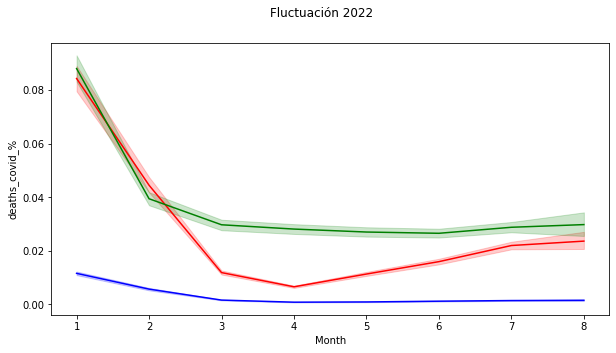

In [757]:
fig = plt.figure(figsize = (10,5))
sns.lineplot(x = 'Month', y = 'deaths_covid_%', data = df_peor_mes_2022, color="blue")  
sns.lineplot(x = 'Month', y = 'total_adult_patients_hospitalized_confirmed_covid_%', data = df_peor_mes_2022, color="red")  
sns.lineplot(x = 'Month', y = 'critical_staffing_shortage_today_yes_%', data = df_peor_mes_2022, color="green")
fig.suptitle('Fluctuación 2022');

In [758]:
df_camas_uci_estado = df[["date","Year","Month","state","adult_icu_bed_utilization"]]
df_camas_uci_estado.groupby(by="state").sum().sort_values(by="adult_icu_bed_utilization",ascending=False)

,Year,Month,adult_icu_bed_utilization
state,,,
TX,1919803,5674,653.240275
AL,1919803,5674,636.579919
RI,1794563,5579,625.081481
GA,1798603,5585,615.531485
NM,1772343,5546,608.611724
MS,1820823,5607,605.295257
NC,1919803,5674,596.113803
DE,1746083,5507,593.886452
NV,1883443,5656,590.088386


In [759]:
estados_ocupación_hospitalar = df[["date","Year","Month","state","inpatient_beds_used_covid"]]
estados_ocupación_hospitalar = estados_ocupación_hospitalar.groupby(by=["state"], as_index=False).sum().sort_values(by="inpatient_beds_used_covid", ascending=False)
estados_ocupación_hospitalar

,state,Year,Month,inpatient_beds_used_covid
45,TX,1919803,5674,5001823.0
5,CA,1808703,5595,4937813.0
10,FL,1776383,5552,4169161.0
35,NY,1772343,5546,3442451.0
39,PA,1798603,5585,2138984.0
11,GA,1798603,5585,2062915.0
36,OH,1798603,5585,1874029.0
15,IL,1822843,5609,1851754.0
23,MI,1798603,5585,1509058.0
28,NC,1919803,5674,1442316.0


In [760]:
### Cantidad de camas ocupadas por COVID-19 entre dos fechas elegidas por el usuario.

camas_covid = df[["date","Year","Month","state","inpatient_beds_used_covid"]]
camas_covid["date"] = camas_covid["date"].dt.date
camas_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47747 entries, 0 to 47746
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       47747 non-null  object 
 1   Year                       47747 non-null  int64  
 2   Month                      47747 non-null  int64  
 3   state                      47747 non-null  object 
 4   inpatient_beds_used_covid  47663 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


C:\Users\Ale\AppData\Local\Temp\ipykernel_7180\2862788605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  camas_covid["date"] = camas_covid["date"].dt.date
